<a href="https://colab.research.google.com/github/omgranados/Net-COVID/blob/master/CoFi2025_104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extraer datos**

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

class StockDataExtractor:
    def __init__(self, ticker: str, days: int = 300):
        self.ticker = ticker
        self.days = days
        self.data = None

    def fetch_data(self):

        end_date = datetime.today()
        start_date = end_date - timedelta(days=self.days)
        stock = yf.Ticker(self.ticker)
        self.data = stock.history(start=start_date, end=end_date)
        if self.data.empty:
            raise ValueError("No se obtuvieron datos del ticker seleccionado.")
        self.data.reset_index(inplace=True)
        print(f"[INFO] Datos descargados correctamente ({len(self.data)} registros)")

    def save_to_csv(self, filename: str = "stock_data.csv"):

        if self.data is None:
            raise ValueError("Primero debes descargar los datos con fetch_data()")
        df_sorted = self.data.sort_values(by="Date")
        df_sorted.to_csv(filename, index=False)
        print(f"[INFO] Datos guardados en {filename}")

if __name__ == "__main__":
    extractor = StockDataExtractor("MSFT", 400)
    extractor.fetch_data()
    extractor.save_to_csv("stock_data.csv")


[INFO] Datos descargados correctamente (274 registros)
[INFO] Datos guardados en stock_data.csv


# **Estadísticas Básicas 1**

Rendimiento Medio: 0.28%
Desviación Estándar del Rendimiento: 2.93%


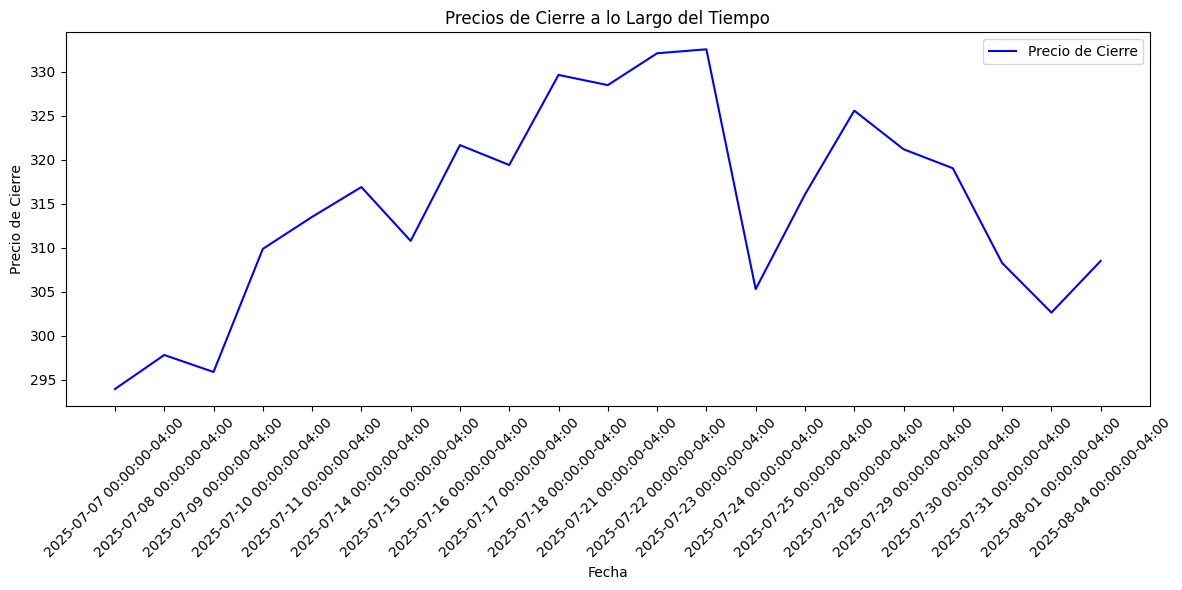

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar el archivo CSV en un DataFrame
df = pd.read_csv('stock_data.csv')

# 2. Rendimiento diario
df['Daily Return'] = df['Close'].pct_change() * 100  # en porcentaje

# 3. Rendimiento medio y la desviación estándar
mean_return = df['Daily Return'].mean()
std_return = df['Daily Return'].std()
print(f'Rendimiento Medio: {mean_return:.2f}%')
print(f'Desviación Estándar del Rendimiento: {std_return:.2f}%')

# 4. Gráfico de precios de cierre
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Precio de Cierre', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title('Precios de Cierre a lo Largo del Tiempo')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

[INFO] Datos cargados correctamente desde stock_data.csv
[INFO] Rendimiento diario calculado y agregado a la tabla
📈 Rendimiento Medio: 0.07%
📉 Desviación Estándar del Rendimiento: 1.57%


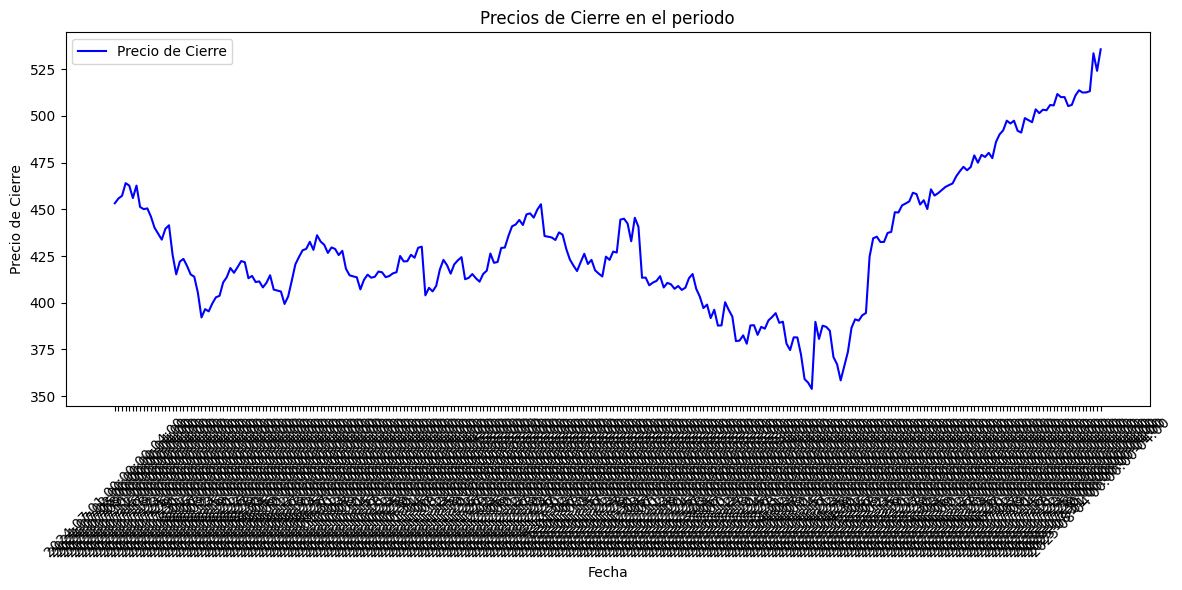

[INFO] Gráfico de precios mostrado correctamente


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

class StockAnalyzer:
    def __init__(self, file_path: str):

        self.file_path = file_path
        self.df = None

    def load_data(self):

        try:
            self.df = pd.read_csv(self.file_path)
            print(f"[INFO] Datos cargados correctamente desde {self.file_path}")
        except FileNotFoundError:
            raise FileNotFoundError(f"No se encontró el archivo: {self.file_path}")

    def calculate_daily_return(self):

        if self.df is None:
            raise ValueError("Cargar los datos con load_data()")
        self.df['Daily Return'] = self.df['Close'].pct_change() * 100
        print("[INFO] Rendimiento diario calculado y agregado a la tabla")

    def calculate_statistics(self):

        if self.df is None or 'Daily Return' not in self.df.columns:
            raise ValueError("Calcular el rendimiento diario antes de obtener estadísticas")
        mean_return = self.df['Daily Return'].mean()
        std_return = self.df['Daily Return'].std()
        print(f"📈 Rendimiento Medio: {mean_return:.2f}%")
        print(f"📉 Desviación Estándar del Rendimiento: {std_return:.2f}%")
        return mean_return, std_return

    def plot_close_prices(self):

        if self.df is None:
            raise ValueError("Cargar los datos con load_data()")
        plt.figure(figsize=(12, 6))
        plt.plot(self.df['Date'], self.df['Close'], label='Precio de Cierre', color='blue')
        plt.xlabel('Fecha')
        plt.ylabel('Precio de Cierre')
        plt.title('Precios de Cierre en el periodo')
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()
        print("[INFO] Gráfico de precios mostrado correctamente")

if __name__ == "__main__":
    analyzer = StockAnalyzer("stock_data.csv")
    analyzer.load_data()
    analyzer.calculate_daily_return()
    analyzer.calculate_statistics()
    analyzer.plot_close_prices()


# **Estadísticas Básicas 2**

***Datos con volumen***

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

class DataExtractor:
    def __init__(self, ticker: str = "TSLA", days: int = 100):

        self.ticker = ticker
        self.days = days
        self.data = None

    def fetch_data(self):

        end_date = datetime.today()
        start_date = end_date - timedelta(days=self.days * 1.5)  # margen para asegurar 100 jornadas
        stock = yf.Ticker(self.ticker)
        df = stock.history(start=start_date, end=end_date)
        if df.empty:
            raise ValueError("No se obtuvieron datos para el ticker seleccionado.")
        df.reset_index(inplace=True)
        # Filtrar solo las columnas necesarias
        self.data = df[['Date', 'Close', 'Volume']].tail(self.days)
        print(f"[INFO] Datos descargados: {len(self.data)} registros")

    def save_to_csv(self, filename: str = "stock_dataVol.csv"):

        if self.data is None:
            raise ValueError("Descargar los datos con fetch_data()")
        df_sorted = self.data.sort_values(by="Date")
        df_sorted.to_csv(filename, index=False)
        print(f"[INFO] Archivo CSV creado correctamente: {filename}")

if __name__ == "__main__":
    extractor = DataExtractor(days=100)
    extractor.fetch_data()
    extractor.save_to_csv("stock_dataVol.csv")


[INFO] Datos descargados: 100 registros
[INFO] Archivo CSV creado correctamente: stock_dataVol.csv


[INFO] Datos cargados correctamente desde stock_data.csv
[INFO] Promedio móvil de 20 días calculado correctamente
📊 Fechas con volumen superior al 90% del promedio de 50 días:
49     2024-09-10 00:00:00-04:00
50     2024-09-11 00:00:00-04:00
54     2024-09-17 00:00:00-04:00
55     2024-09-18 00:00:00-04:00
56     2024-09-19 00:00:00-04:00
                 ...            
267    2025-07-25 00:00:00-04:00
270    2025-07-30 00:00:00-04:00
271    2025-07-31 00:00:00-04:00
272    2025-08-01 00:00:00-04:00
273    2025-08-04 00:00:00-04:00
Name: Date, Length: 117, dtype: object


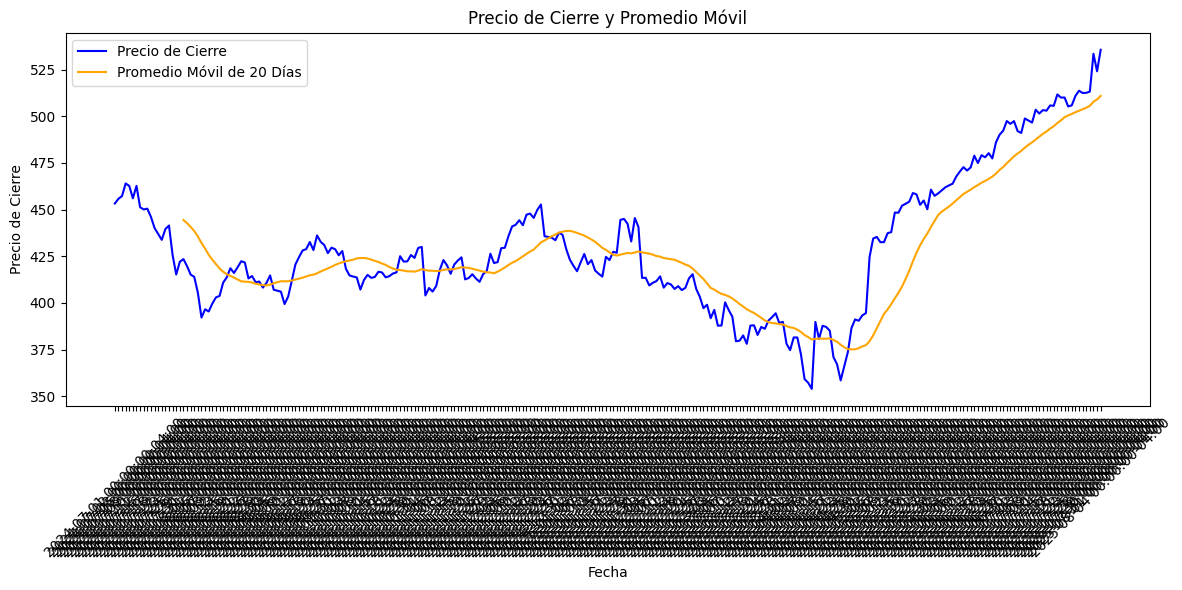

[INFO] Gráfico generado correctamente


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

class VolumeAnalyzer:
    def __init__(self, file_path: str):

        self.file_path = file_path
        self.df = None

    def load_data(self):

        try:
            self.df = pd.read_csv(self.file_path)
            print(f"[INFO] Datos cargados correctamente desde {self.file_path}")
        except FileNotFoundError:
            raise FileNotFoundError(f"No se encontró el archivo: {self.file_path}")

    def calculate_moving_average(self, window=20):

        if self.df is None:
            raise ValueError("Cargar los datos con load_data()")
        self.df[f'{window}-Day MA'] = self.df['Close'].rolling(window=window).mean()
        print(f"[INFO] Promedio móvil de {window} días calculado correctamente")

    def find_high_volume_dates(self, window=50, threshold=0.9):

        if self.df is None:
            raise ValueError("Cargar los datos con load_data()")
        self.df[f'{window}-Day Volume MA'] = self.df['Volume'].rolling(window=window).mean()
        high_volume_mask = self.df['Volume'] > threshold * self.df[f'{window}-Day Volume MA']
        high_volume_dates = self.df.loc[high_volume_mask, 'Date']
        print(f"📊 Fechas con volumen superior al {threshold*100:.0f}% del promedio de {window} días:")
        print(high_volume_dates)
        return high_volume_dates

    def plot_close_and_ma(self, window=20):

        if self.df is None:
            raise ValueError("Cargar los datos con load_data()")
        plt.figure(figsize=(12, 6))
        plt.plot(self.df['Date'], self.df['Close'], label='Precio de Cierre', color='blue')
        ma_column = f'{window}-Day MA'
        if ma_column in self.df.columns:
            plt.plot(self.df['Date'], self.df[ma_column], label=f'Promedio Móvil de {window} Días', color='orange')
        plt.xlabel('Fecha')
        plt.ylabel('Precio de Cierre')
        plt.title('Precio de Cierre y Promedio Móvil')
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()
        print("[INFO] Gráfico generado correctamente")

if __name__ == "__main__":
    analyzer = VolumeAnalyzer("stock_data.csv")
    analyzer.load_data()
    analyzer.calculate_moving_average(window=20)
    analyzer.find_high_volume_dates(window=50, threshold=0.9)
    analyzer.plot_close_and_ma(window=20)



# **Estadísticas Básicas 3**

[INFO] Datos cargados correctamente desde stock_data.csv
[INFO] Medias móviles MA20 y MA50 calculadas
[INFO] RSI14 calculado correctamente


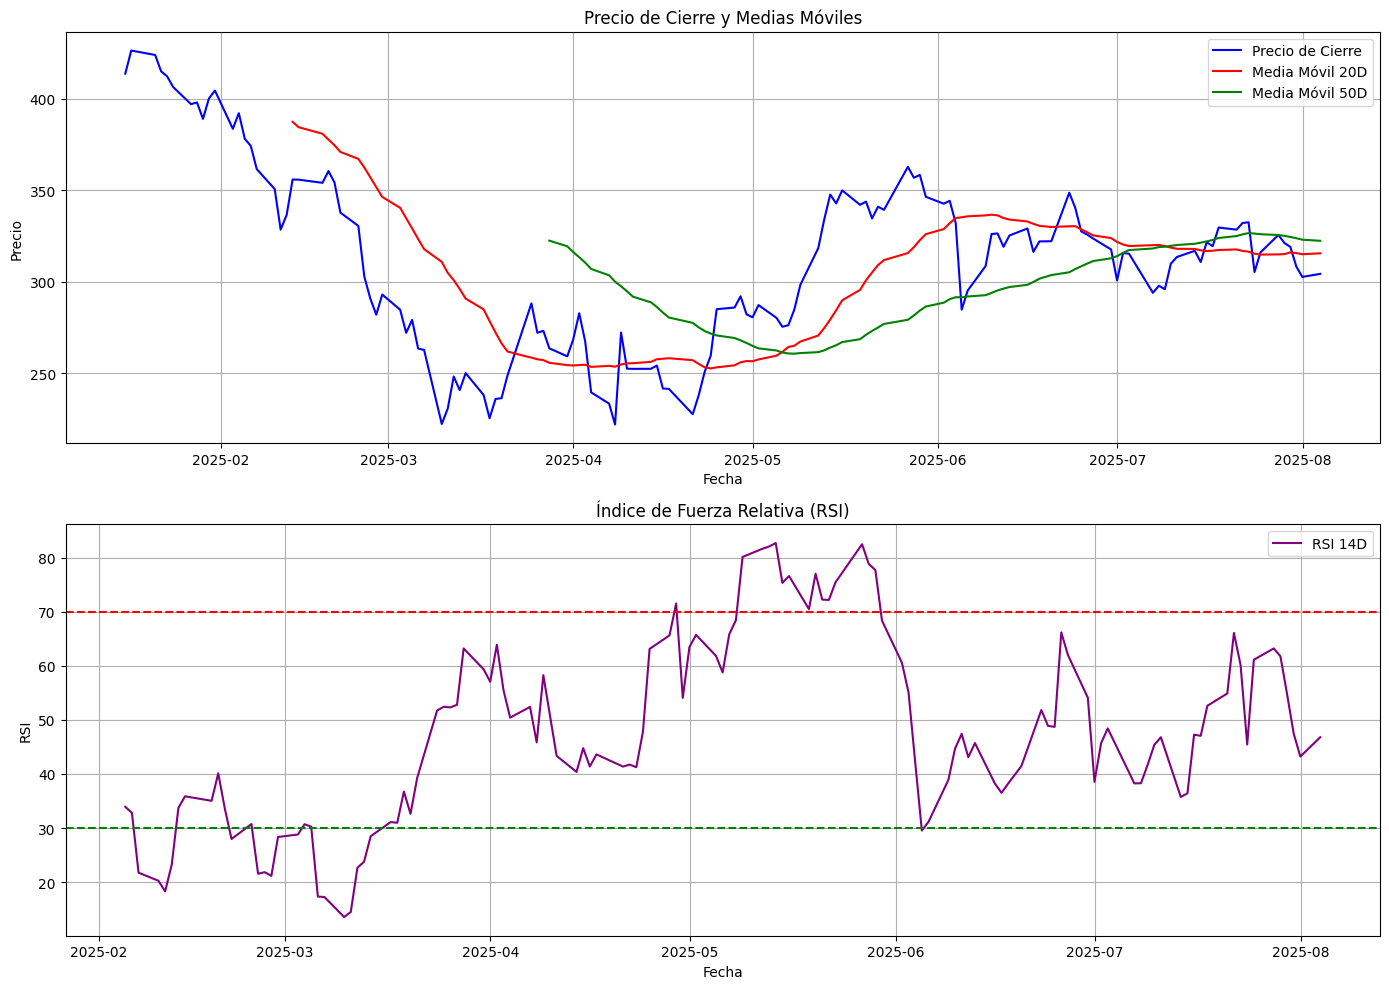

[INFO] Gráficos generados correctamente


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class TechnicalAnalyzer:
    def __init__(self, file_path: str):

        self.file_path = file_path
        self.df = None

    def load_data(self):

        try:
            self.df = pd.read_csv(self.file_path, parse_dates=['Date'])
            self.df.set_index('Date', inplace=True)
            print(f"[INFO] Datos cargados correctamente desde {self.file_path}")
        except FileNotFoundError:
            raise FileNotFoundError(f"No se encontró el archivo: {self.file_path}")

    def calculate_moving_averages(self, short_window=20, long_window=50):

        if self.df is None:
            raise ValueError("Primero debes cargar los datos con load_data()")
        self.df[f'MA{short_window}'] = self.df['Close'].rolling(window=short_window).mean()
        self.df[f'MA{long_window}'] = self.df['Close'].rolling(window=long_window).mean()
        print(f"[INFO] Medias móviles MA{short_window} y MA{long_window} calculadas")

    def calculate_rsi(self, period=14):

        if self.df is None:
            raise ValueError("Primero debes cargar los datos con load_data()")
        delta = self.df['Close'].diff()
        gain = delta.where(delta > 0, 0).rolling(window=period).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
        rs = gain / loss
        self.df[f'RSI{period}'] = 100 - (100 / (1 + rs))
        print(f"[INFO] RSI{period} calculado correctamente")

    def plot_analysis(self):

        if self.df is None:
            raise ValueError("Primero debes cargar los datos con load_data()")

        plt.figure(figsize=(14, 10))

        # Gráfico de precios de cierre y medias móviles
        plt.subplot(2, 1, 1)
        plt.plot(self.df.index, self.df['Close'], label='Precio de Cierre', color='blue')
        if 'MA20' in self.df.columns:
            plt.plot(self.df.index, self.df['MA20'], label='Media Móvil 20D', color='red')
        if 'MA50' in self.df.columns:
            plt.plot(self.df.index, self.df['MA50'], label='Media Móvil 50D', color='green')
        plt.xlabel('Fecha')
        plt.ylabel('Precio')
        plt.title('Precio de Cierre y Medias Móviles')
        plt.legend()
        plt.grid()

        # Gráfico del RSI
        if 'RSI14' in self.df.columns:
            plt.subplot(2, 1, 2)
            plt.plot(self.df.index, self.df['RSI14'], label='RSI 14D', color='purple')
            plt.axhline(y=70, color='r', linestyle='--')
            plt.axhline(y=30, color='g', linestyle='--')
            plt.xlabel('Fecha')
            plt.ylabel('RSI')
            plt.title('Índice de Fuerza Relativa (RSI)')
            plt.legend()
            plt.grid()

        plt.tight_layout()
        plt.show()
        print("[INFO] Gráficos generados correctamente")


if __name__ == "__main__":
    analyzer = TechnicalAnalyzer("stock_data.csv")
    analyzer.load_data()
    analyzer.calculate_moving_averages(short_window=20, long_window=50)
    analyzer.calculate_rsi(period=14)
    analyzer.plot_analysis()
